In [35]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [36]:
df_soil = pd.read_csv('CleanBy_NormalRange(Soil Fertility).csv')
df_soil

,DistrictId,DistrictName,BlockId,BlockName,SampleNo,SoilPh,ElectricalConductivity,OrganicCarbon,Nitrogen,Phosphorous,Potassium,Sulphur,Zinc,Iron,Magnesium
0,81,BHIWANI,454,Bawani Khera,HR6086841/2016-17/11336370,7.40,0.51,0.40,32.17,53.28,4.53,0.22,0.00,1.18,0.82
1,81,BHIWANI,454,Bawani Khera,HR61114/2016-17/13513223,6.74,0.78,0.40,152.00,54.12,3.12,2.51,0.06,5.44,1.01
2,81,BHIWANI,454,Bawani Khera,HR61114/2016-17/13811552,7.80,0.11,0.40,125.30,125.30,52.80,1.24,1.76,1.56,1.96
3,81,BHIWANI,454,Bawani Khera,HR61114/2016-17/14025035,7.30,0.16,0.39,275.20,98.60,8.02,3.29,0.15,20.99,0.67
4,81,BHIWANI,454,Bawani Khera,HR61114/2016-17/23187010,7.30,0.65,0.33,137.20,52.90,59.16,2.73,0.49,7.07,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,76,SONIPAT,557,Mundlana,HR59627/2015-16/587590,9.53,0.60,0.66,148.90,5.40,333.80,42.01,0.84,19.60,6.00
23923,76,SONIPAT,557,Mundlana,HR59627/2015-16/587855,8.45,0.66,0.59,156.90,20.80,308.00,39.29,1.70,17.30,3.20
23924,76,SONIPAT,557,Mundlana,HR59627/2015-16/588103,8.40,0.70,0.63,145.00,13.70,370.70,50.49,0.70,35.90,6.50
23925,76,SONIPAT,557,Mundlana,HR59627/2015-16/588357,8.75,0.46,0.33,164.60,28.40,288.90,19.33,0.70,16.90,3.70


In [37]:
# Load the dataset
df = df_soil

<center> <h1> Machine Learning Model </h1>

### Decission Tree

In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features (Soil attributes) and target variable (DistrictName)
X1 = df.drop(['DistrictId', 'DistrictName', 'BlockId', 'BlockName', 'SampleNo'], axis=1)  # Features
y1 = df['DistrictName']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Build the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X1_train, y1_train)

# Make predictions
y_pred = model.predict(X1_test)

# Evaluate the model
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y1_test, y_pred))


Accuracy: 0.85
              precision    recall  f1-score   support

   FARIDABAD       0.71      0.73      0.72      1194
     GURGAON       0.00      0.00      0.00         0
       HISAR       0.00      0.00      0.00         2
        JIND       0.00      0.00      0.00         1
     KAITHAL       0.67      0.67      0.67         3
      KARNAL       0.00      0.00      0.00         0
MAHENDRAGARH       1.00      1.00      1.00         1
       MEWAT       0.73      0.72      0.72      1226
      PALWAL       0.58      0.49      0.53        39
     PANIPAT       1.00      0.67      0.80         3
      REWARI       1.00      1.00      1.00      2307
      ROHTAK       0.67      0.67      0.67         3
       SIRSA       0.00      0.00      0.00         2
     SONIPAT       0.00      0.00      0.00         5

    accuracy                           0.85      4786
   macro avg       0.45      0.42      0.44      4786
weighted avg       0.85      0.85      0.85      4786



In [39]:
print(model.predict([[9,0.85,0.19,64.19,10.63,370.65,57,0.8,6.71,3.97]]));

['FARIDABAD']


### RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [41]:
# Encode the DistrictName column
label_encoder = LabelEncoder()
df['DistrictName_Encoded'] = label_encoder.fit_transform(df['DistrictName'])

In [42]:
# Define features and target variable
features = ['SoilPh', 'ElectricalConductivity', 'OrganicCarbon', 'Nitrogen', 
            'Phosphorous', 'Potassium', 'Sulphur', 'Zinc', 'Iron', 'Magnesium']
target = 'DistrictName_Encoded'

In [43]:
# Split the data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

In [46]:
# Decode the predicted labels
predicted_districts = label_encoder.inverse_transform(predictions)

In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")
print(classification_report(y_test, predictions))

Accuracy of the Random Forest model: 90.24%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.83      0.80      0.81      1194
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.50      0.67      0.57         3
          10       0.00      0.00      0.00         1
          11       0.80      0.84      0.82      1226
          12       0.96      0.56      0.71        39
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00      2307
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5

    accuracy                           0.90      4786
   macro avg       0.39      0.35      0.36      4786
weighted avg       0.90      0.90      0.90      4786



In [48]:
# Function to predict DistrictName based on soil data input
def predict_district(rf_model, label_encoder, soil_data):
    # Make predictions using the provided model
    prediction = rf_model.predict(soil_data)

    # Decode the predicted label
    predicted_district = label_encoder.inverse_transform(prediction)
    return predicted_district[0]

In [49]:
# Example soil data for prediction
new_soil_data = [[7.8, 0.62, 0.36, 110.88, 11.12, 410.19, 49.2, 0.83, 14.55, 2.41]]

# Predict the DistrictName based on the new soil data
predicted_district = predict_district(rf_classifier, label_encoder, new_soil_data)
print(f"The predicted DistrictName is: {predicted_district}")

The predicted DistrictName is: FARIDABAD


### SVM

In [77]:
# Import necessary libraries
from sklearn.svm import SVC

# Separate features (Soil attributes) and target variable (DistrictName)
X2 = df.drop(['DistrictId', 'DistrictName', 'BlockId', 'BlockName', 'SampleNo', 'DistrictName_Encoded'], axis=1)  # Features
y2 = df['DistrictName']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Build the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X2_train, y2_train)

# Make predictions
y2_pred = svm_model.predict(X2_test)

# Evaluate the model
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y2_test, y2_pred))


Accuracy: 0.81
              precision    recall  f1-score   support

     BHIWANI       0.00      0.00      0.00         0
   FARIDABAD       0.63      0.65      0.64      1194
       HISAR       0.00      0.00      0.00         2
        JIND       0.00      0.00      0.00         1
     KAITHAL       0.00      0.00      0.00         3
MAHENDRAGARH       0.00      0.00      0.00         1
       MEWAT       0.64      0.64      0.64      1226
      PALWAL       0.00      0.00      0.00        39
     PANIPAT       0.00      0.00      0.00         3
      REWARI       0.99      0.99      0.99      2307
      ROHTAK       0.00      0.00      0.00         3
       SIRSA       0.00      0.00      0.00         2
     SONIPAT       0.00      0.00      0.00         5

    accuracy                           0.81      4786
   macro avg       0.17      0.18      0.18      4786
weighted avg       0.80      0.81      0.80      4786



### XGBoost

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Separate features (Soil attributes) and target variable (DistrictName)
X3 = df.drop(['DistrictId', 'DistrictName', 'BlockId', 'BlockName', 'SampleNo', 'DistrictName_Encoded'], axis=1)  # Features
y3 = df['DistrictName']  # Target variable

# Encode the target variable
label_encoder = LabelEncoder()
y3_encoded = label_encoder.fit_transform(y3)

# Split the dataset into training and testing sets (80% training, 20% testing)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3_encoded, test_size=0.2, random_state=42)

# Build the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X3_train, y3_train)

# Make predictions
y3_pred = xgb_model.predict(X3_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y3_pred)

# Evaluate the model
accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y3_test, y3_pred))


Accuracy: 0.94
              precision    recall  f1-score   support

           1       0.88      0.87      0.88      1194
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.40      0.67      0.50         3
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.87      0.89      0.88      1226
          12       0.97      0.77      0.86        39
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00      2307
          16       1.00      0.67      0.80         3
          17       0.00      0.00      0.00         2
          18       0.83      1.00      0.91         5

    accuracy                           0.94      4786
   macro avg       0.53      0.50      0.51      4786
weighted avg       0.94      0.94      0.94      4786



In [64]:
# Function to predict DistrictName based on soil data input
def predict_district(rf_model, label_encoder, soil_data):
    # Make predictions using the provided model
    prediction = rf_model.predict(soil_data)

    # Decode the predicted label
    predicted_district = label_encoder.inverse_transform(prediction)
    return predicted_district[0]

In [81]:
# save xgboost model to file
import pickle

pickle.dump(xgb_model, open("xgb_model.pkl", "wb"))

In [82]:
import pickle

loaded_model = pickle.load(open("xgb_model.pkl", "rb"))

# using the XGBoost model to predict the DistrictName for new soil data
new_soil_data = [[7.8, 0.62, 0.36, 110.88, 11.12, 410.19, 49.2, 0.83, 14.55, 2.41]]

# Create a dataframe with the new soil data using the same column names as the training data
new_soil_df = pd.DataFrame(new_soil_data, columns=X3_train.columns)

# Predict the DistrictName based on the new soil data
predicted_district = predict_district(loaded_model, label_encoder, new_soil_df)
print(f"The predicted DistrictName is: {predicted_district}")

The predicted DistrictName is: FARIDABAD


### GradientBoostingClassifier

In [85]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

# Separate features (Soil attributes) and target variable (DistrictName)
X4 = df.drop(['DistrictId', 'DistrictName', 'BlockId', 'BlockName', 'SampleNo', 'DistrictName_Encoded'], axis=1)  # Features
y4 = df['DistrictName']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Build the Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X4_train, y4_train)

# Make predictions
y4_pred = model.predict(X4_test)

# Evaluate the model
accuracy = accuracy_score(y4_test, y4_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y4_test, y4_pred))


Accuracy: 0.85
              precision    recall  f1-score   support

   FARIDABAD       0.71      0.73      0.72      1194
     GURGAON       0.00      0.00      0.00         0
       HISAR       0.00      0.00      0.00         2
        JIND       0.00      0.00      0.00         1
     KAITHAL       0.67      0.67      0.67         3
      KARNAL       0.00      0.00      0.00         0
MAHENDRAGARH       1.00      1.00      1.00         1
       MEWAT       0.73      0.72      0.72      1226
      PALWAL       0.58      0.49      0.53        39
     PANIPAT       1.00      0.67      0.80         3
      REWARI       1.00      1.00      1.00      2307
      ROHTAK       0.67      0.67      0.67         3
       SIRSA       0.00      0.00      0.00         2
     SONIPAT       0.00      0.00      0.00         5

    accuracy                           0.85      4786
   macro avg       0.45      0.42      0.44      4786
weighted avg       0.85      0.85      0.85      4786



### CatBoost

In [67]:
from catboost import CatBoostClassifier

# Separate features (Soil attributes) and target variable (DistrictName)
X5 = df.drop(['DistrictId', 'DistrictName', 'BlockId', 'BlockName', 'SampleNo', 'DistrictName_Encoded'], axis=1)  # Features
y5 = df['DistrictName']  # Target variable

# Encode the target variable
label_encoder = LabelEncoder()
y5_encoded = label_encoder.fit_transform(y5)

# Split the dataset into training and testing sets (80% training, 20% testing)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5_encoded, test_size=0.2, random_state=42)

# Build the CatBoost model
cat_model = CatBoostClassifier(random_state=42)
cat_model.fit(X5_train, y5_train)

# Make predictions with CatBoost
y_pred_cat = cat_model.predict(X5_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_cat)

# Evaluate the model
accuracy = accuracy_score(y5_test, y_pred_cat)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y5_test, y_pred_cat))


Learning rate set to 0.091982
0:	learn: 1.8716004	total: 37.4ms	remaining: 37.4s
1:	learn: 1.5622382	total: 74.7ms	remaining: 37.3s
2:	learn: 1.3565008	total: 110ms	remaining: 36.5s
3:	learn: 1.2040692	total: 144ms	remaining: 36s
4:	learn: 1.0842427	total: 177ms	remaining: 35.3s
5:	learn: 0.9876247	total: 210ms	remaining: 34.8s
6:	learn: 0.9089305	total: 243ms	remaining: 34.5s
7:	learn: 0.8403836	total: 277ms	remaining: 34.4s
8:	learn: 0.7825560	total: 312ms	remaining: 34.3s
9:	learn: 0.7328739	total: 346ms	remaining: 34.3s
10:	learn: 0.6884590	total: 379ms	remaining: 34.1s
11:	learn: 0.6488476	total: 414ms	remaining: 34.1s
12:	learn: 0.6164296	total: 445ms	remaining: 33.8s
13:	learn: 0.5858193	total: 478ms	remaining: 33.7s
14:	learn: 0.5578186	total: 514ms	remaining: 33.7s
15:	learn: 0.5335932	total: 550ms	remaining: 33.8s
16:	learn: 0.5116848	total: 587ms	remaining: 33.9s
17:	learn: 0.4921626	total: 628ms	remaining: 34.3s
18:	learn: 0.4744880	total: 665ms	remaining: 34.4s
19:	learn: 

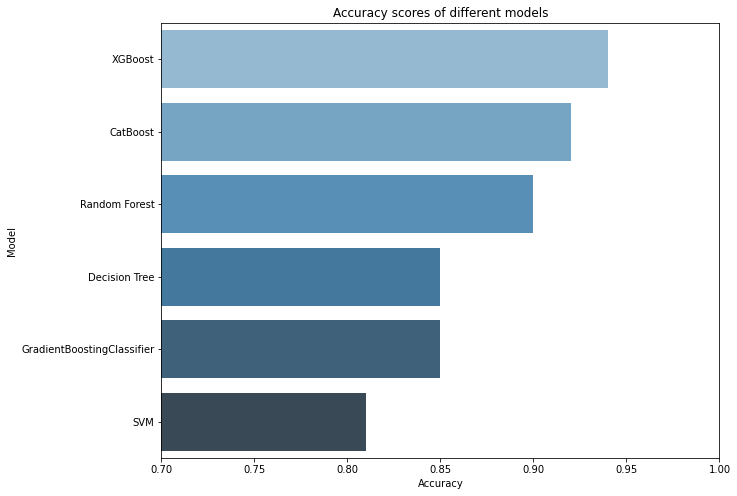

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataframe with the model names and accuracy scores
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'XGBoost', 'GradientBoostingClassifier', 'CatBoost']
model_scores = [0.85, 0.90, 0.81, 0.94, 0.85, 0.92]
model_df = pd.DataFrame({'model': model_names, 'accuracy': model_scores})

# Sort the DataFrame by accuracy scores
model_df = model_df.sort_values(by='accuracy', ascending=False)

# Plot the model scores
plt.figure(figsize=(10, 8))
sns.barplot(x='accuracy', y='model', data=model_df, palette='Blues_d')
plt.title('Accuracy scores of different models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.7, 1.0)
plt.show()
